# Heart Sound Classification

## Exploratory Data Analysis

### Sound Samples

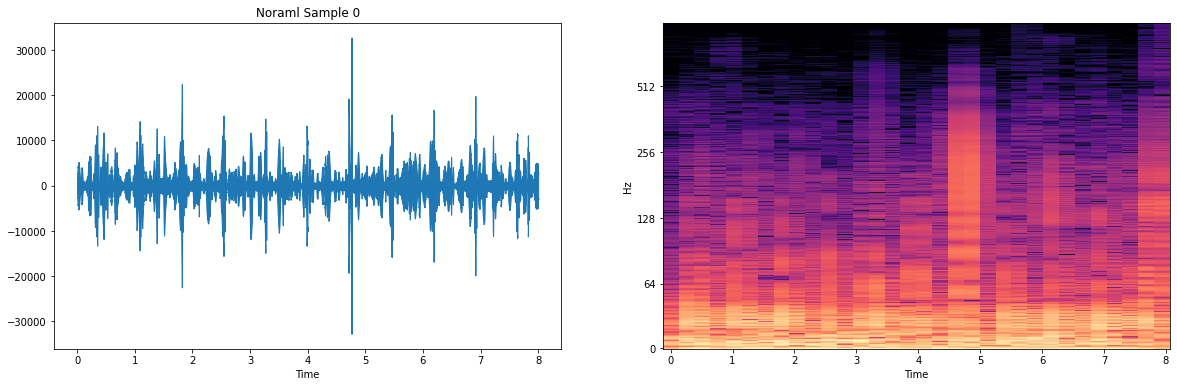

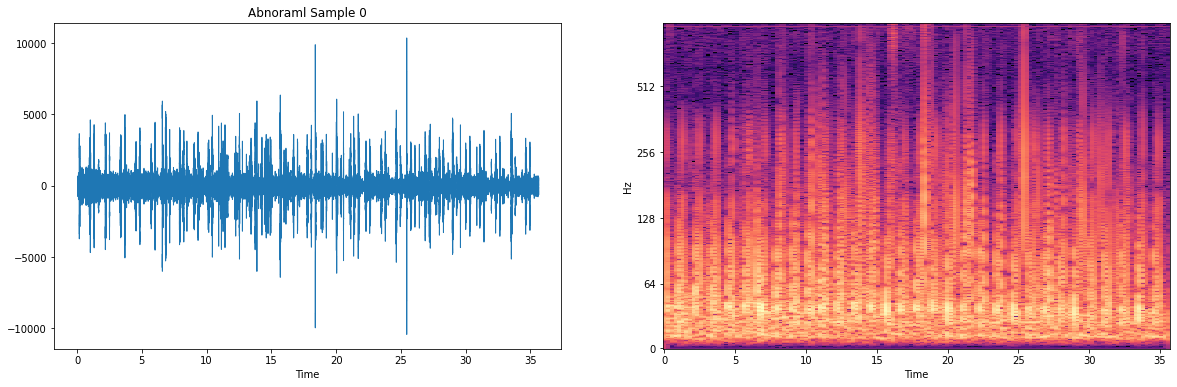

In [1]:
from notebook_utils import view_random_samples

view_random_samples(n_samples=1, seed=0)

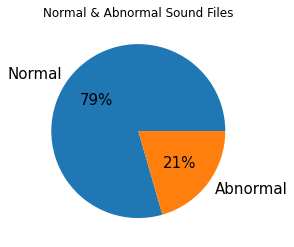

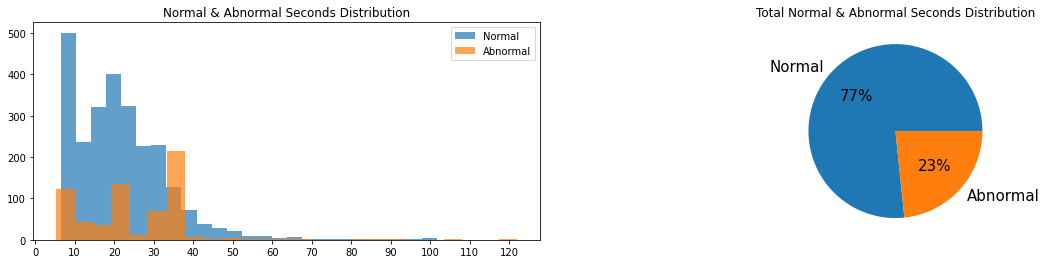

In [2]:
from notebook_utils import view_files_dist, view_seconds_dist

view_files_dist()
view_seconds_dist()

# Preprocssing

## Wavelet Denoising
#### Wavelets denoising has proven improvments in heart sound as it decreases the SNR which helps in better analysis of heart sound

![](./docs/db6.png)

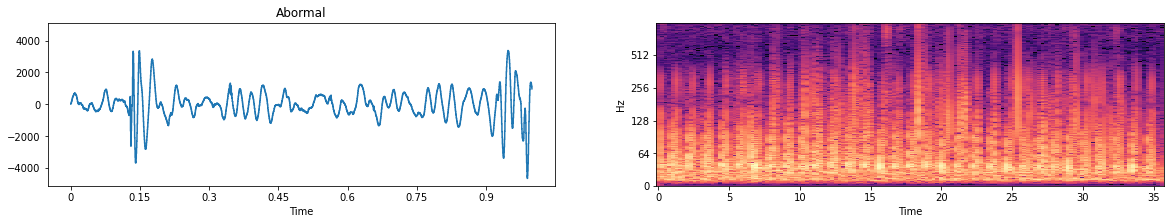

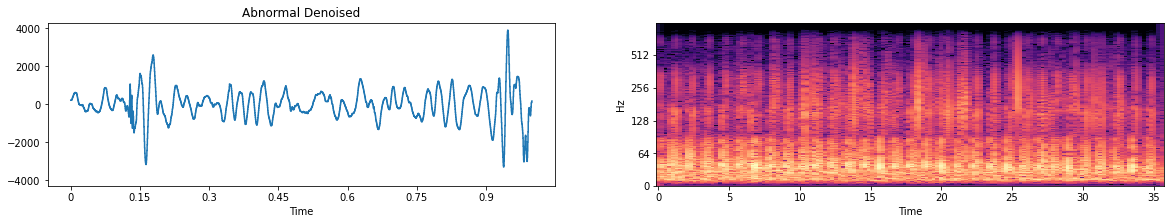

In [3]:
from notebook_utils import view_wavlet_denoising

view_wavlet_denoising()

## Feature Extraction

#### Features are extracted from the wav files after loading and we can catergorize them into : -
- Signal & Information Theory Features
- Statsitical Features
- Mel Frequency Features (MFCCs)

#### The feature vector is as follows

|Max_Amplitude|Dominant_Freq|Entropy|Mean|Median|STD|Kurtosis|Skewness|IQR|First_Percentile|Second_Percentile|Third_Percentile|MFCC1|MFCC2|MFCC3|MFCC4|MFCC5|MFCC6|MFCC7|MFCC8|MFCC9|MFCC10|MFCC11|MFCC12|MFCC13|
|---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |---------- |




#### For example for feature extraction from sound we apply our method `extract_segment_features` to the sound we need to process

In [4]:
from feature_extraction import extract_segment_features
import notebook_utils
print([extract_segment_features(notebook_utils.normal_physio[0][0])])

[[15336.0, 61.68339595132619, 7.823496394742312, -0.8233752, -12.0, 1949.9056, 10.474070636603942, 0.5970102873379598, 1325.0, -684.0, -12.0, 641.0, 717.77246, 183.24818, 62.39633, 31.720228, 21.039757, 12.485481, 1.1283382, -3.1874726, 0.12989235, 2.3743076, -0.27206597, 1.2528523, 2.0501955]]


#### In our case we can benefit that the sound recordings contains many heart sound cycles so segmenting the heart sound by taking every N cycles togther and we have found N to be 5 is a good number to be able to get useful features and more data segments

In [5]:
from segmentation import build_segements
import notebook_utils
segmented_sounds = build_segements(notebook_utils.physio_arr, sr=2000)
print(len(segmented_sounds))

16749


#### After creating the segements we will extract the features form them and build out dataframe of features to train with using `construct_dataframe`

In [6]:
import os
from feature_extraction import construct_dataframe

if(not os.path.exists("physioNet.csv")):
    construct_dataframe("physioNet")
print("---------------------- DataSet is Ready ----------------------")

---------------------- DataSet is Ready ----------------------


#### Now we can read the csv file using we constructed by `load_heartsound_features`

#### As we can se we have a slight imbalance probelm between classes so we have down sampled some of the majorty class (normal) to improve the class distribution

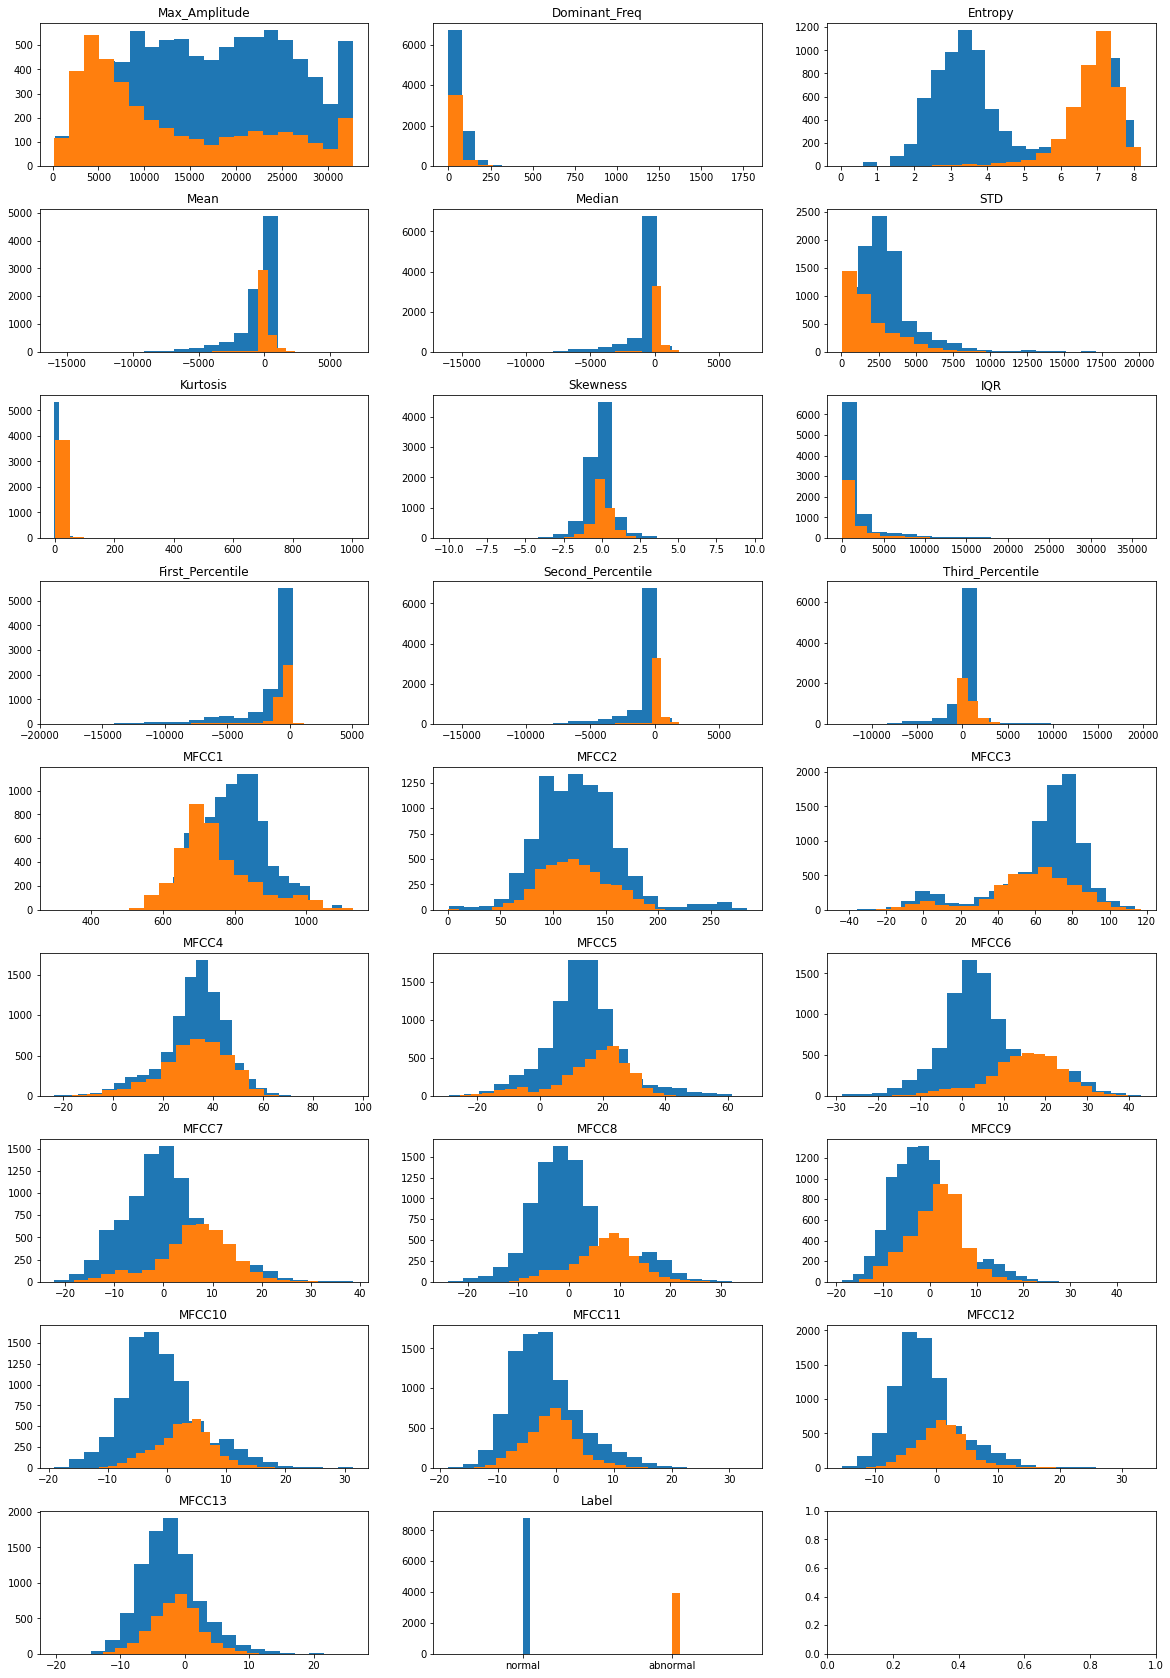

In [7]:
from utils import features_histo, load_heartsound_features
import pandas as pd

hs_df, normal_df, abnormal_df = load_heartsound_features()
dfs = [normal_df, abnormal_df]
features_histo(dfs)

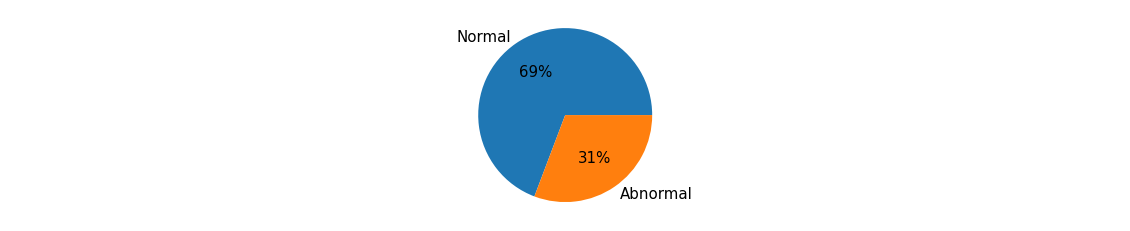

In [8]:
from notebook_utils import view_downsampled_dist

view_downsampled_dist()

## Feature Selection

#### By performing variance based feature selection we have reduced the number of features from 26 to 14, we also created pca features to analyze them

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components= 0.99)
var_threshold = VarianceThreshold(threshold = 0.011)

y = hs_df["Label"].to_numpy() == "normal"
y = y.astype(np.int16)
X = hs_df.drop(columns=["Label"])
X = MinMaxScaler().fit_transform(X)
var_threshold.fit(X)

X_RLVF = var_threshold.transform(X)
principal_X = pca.fit_transform(X)
principal_X_RLVF = pca.fit_transform(X_RLVF)

print(X_RLVF.shape)

(12749, 14)


## Modeling

#### Based on the literature we have tried 3 models (Support Vecotr Machine, Random Forest, XGBoost).
##### For paramter tuning we have used grid search method with the potential params

SVM

,0,1,accuracy,macro avg,weighted avg
precision,0.867893,0.949932,0.924276,0.908912,0.924842
recall,0.887483,0.940485,0.924276,0.913984,0.924276
f1-score,0.877579,0.945185,0.924276,0.911382,0.924509
support,2924.000000,6637.000000,0.924276,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.883130,0.941470,0.923463,0.912300,0.923207
recall,0.870741,0.947489,0.923463,0.909115,0.923463
f1-score,0.876892,0.944470,0.923463,0.910681,0.923315
support,998.000000,2190.000000,0.923463,3188.000000,3188.000000


Random Forest

,0,1,accuracy,macro avg,weighted avg
precision,0.817887,0.938224,0.899383,0.878056,0.901422
recall,0.863201,0.915323,0.899383,0.889262,0.899383
f1-score,0.839933,0.926632,0.899383,0.883283,0.900117
support,2924.000000,6637.000000,0.899383,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.818623,0.928605,0.893036,0.873614,0.894175
recall,0.845691,0.914612,0.893036,0.880152,0.893036
f1-score,0.831937,0.921555,0.893036,0.876746,0.893500
support,998.000000,2190.000000,0.893036,3188.000000,3188.000000


XGboost

,0,1,accuracy,macro avg,weighted avg
precision,0.977536,0.992149,0.987658,0.984842,0.987680
recall,0.982216,0.990056,0.987658,0.986136,0.987658
f1-score,0.979870,0.991101,0.987658,0.985486,0.987666
support,2924.000000,6637.000000,0.987658,9561.000000,9561.000000
,0,1,accuracy,macro avg,weighted avg
precision,0.891000,0.951097,0.932246,0.921048,0.932284
recall,0.892786,0.950228,0.932246,0.921507,0.932246
f1-score,0.891892,0.950662,0.932246,0.921277,0.932264
support,998.000000,2190.000000,0.932246,3188.000000,3188.000000


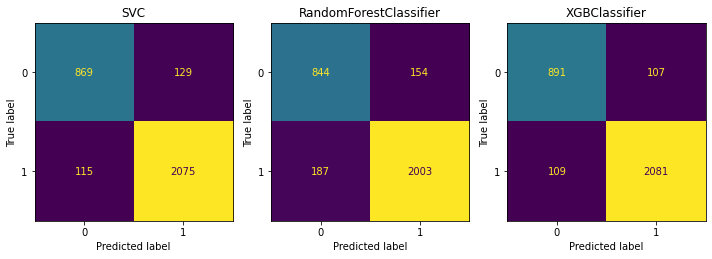

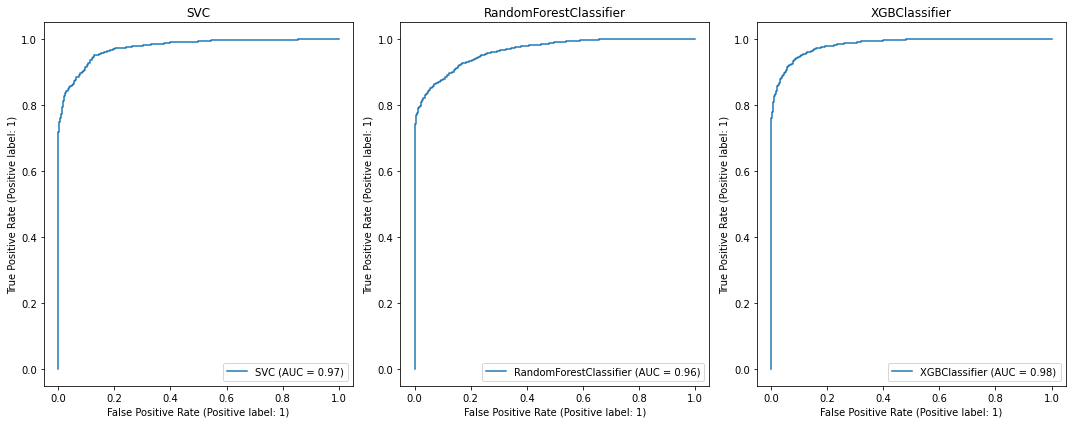

In [10]:
from notebook_utils import compare
from clasifiers import classifiers

params = compare(classifiers, X, y)